<a href="https://colab.research.google.com/github/kylecase/group-3-project-2/blob/main/FinTech_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# Install the required libraries
# pystan 2.19 (current build) does not properly support fbprophet, so I limited to past version to get around error (https://github.com/facebook/prophet/issues/1775#issuecomment-800235720)
!pip install pystan~=2.18
!pip install fbprophet
!pip install hvplot
!pip install holoviews
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [88]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
import numpy as np
import pandas_datareader.data as web
%matplotlib inline

In [89]:
# Read the AMT CSV file into a Pandas DataFrame
url_AMT = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/AMT.csv'
url_AMT_2009 = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/AMT2009.csv'
df_AMT = pd.read_csv(url_AMT_2009, index_col= 'Date', parse_dates= True, infer_datetime_format= True)

# Dataset is now stored in a Pandas Dataframe
df_AMT

Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-03-09   26.750000   27.690001   26.590000   26.870001   21.902464   
2009-03-10   27.480000   28.480000   27.010000   28.389999   23.141464   
2009-03-11   28.570000   29.620001   28.040001   29.299999   23.883224   
2009-03-12   28.639999   30.000000   27.920000   29.860001   24.339701   
2009-03-13   29.900000   29.959999   28.459999   29.240000   23.834316   
...                ...         ...         ...         ...         ...   
2022-10-13  179.869995  191.440002  178.169998  189.850006  189.850006   
2022-10-14  191.610001  192.669998  185.059998  185.779999  185.779999   
2022-10-17  189.759995  195.899994  188.830002  192.490005  192.490005   
2022-10-18  194.520004  197.940002  194.220001  197.220001  197.220001   
2022-10-19  195.009995  196.190002  190.509995  190.990005  190.990005   

             Volume  
Date                 
2009-03-09  2983800  
2009-03-10  5823900  
2009-03-11  4337300  
2009-03-12  5973300  
2009-03-13  3802800  
...             ...  
2022-10-13  3518100  
2022-10-14  2466400  
2022-10-17  3040900  
2022-10-18  3253400  
2022-10-19  1824700  

[3430 rows x 6 columns]

In [90]:
# Read the AMT CSV file into a Pandas DataFrame
url_AVB = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/AVB.csv'
url_AVB_2009 = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/AVB2009.csv'
df_AVB = pd.read_csv(url_AVB_2009, index_col= 'Date', parse_dates= True, infer_datetime_format= True)

# Dataset is now stored in a Pandas Dataframe
df_AVB

Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-03-09   41.009998   43.139999   40.349998   42.959999   26.988663   
2009-03-10   44.130001   49.320000   43.279999   49.070000   30.827137   
2009-03-11   48.660000   50.049999   46.340000   47.049999   29.558121   
2009-03-12   46.689999   50.619999   46.150002   49.840000   31.310892   
2009-03-13   49.910000   50.139999   47.889999   48.990002   30.776888   
...                ...         ...         ...         ...         ...   
2022-10-13  169.199997  176.410004  168.050003  175.869995  175.869995   
2022-10-14  178.110001  178.639999  169.389999  169.580002  169.580002   
2022-10-17  172.970001  175.809998  172.050003  175.380005  175.380005   
2022-10-18  178.089996  180.839996  176.020004  177.759995  177.759995   
2022-10-19  175.470001  176.309998  171.589996  173.350006  173.350006   

             Volume  
Date                 
2009-03-09  3638700  
2009-03-10  7205500  
2009-03-11  5756100  
2009-03-12  4572600  
2009-03-13  4236000  
...             ...  
2022-10-13   748700  
2022-10-14   711900  
2022-10-17  1001500  
2022-10-18   596500  
2022-10-19   572300  

[3430 rows x 6 columns]

In [91]:
# Read the AMT CSV file into a Pandas DataFrame
url_CCI = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/CCI.csv'
url_CCI_2009 = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/CCI2009.csv'

df_CCI = pd.read_csv(url_CCI_2009, index_col= 'Date', parse_dates= True, infer_datetime_format= True)

# Dataset is now stored in a Pandas Dataframe
df_CCI

Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-03-09   16.389999   17.080000   16.389999   16.709999   12.323498   
2009-03-10   16.860001   18.540001   16.790001   18.480000   13.628859   
2009-03-11   18.600000   19.670000   18.559999   19.400000   14.307349   
2009-03-12   18.620001   20.299999   18.400000   20.190001   14.889971   
2009-03-13   20.469999   20.469999   19.320000   20.230000   14.919470   
...                ...         ...         ...         ...         ...   
2022-10-13  126.349998  131.899994  124.820000  131.119995  131.119995   
2022-10-14  133.289993  133.789993  127.430000  127.650002  127.650002   
2022-10-17  129.889999  134.110001  129.389999  132.970001  132.970001   
2022-10-18  134.970001  135.800003  132.050003  133.380005  133.380005   
2022-10-19  131.729996  133.779999  130.320007  130.699997  130.699997   

             Volume  
Date                 
2009-03-09  2050200  
2009-03-10  2484900  
2009-03-11  3152400  
2009-03-12  3917200  
2009-03-13  1862100  
...             ...  
2022-10-13  2976100  
2022-10-14  2449100  
2022-10-17  2436000  
2022-10-18  3189400  
2022-10-19  2576800  

[3430 rows x 6 columns]

In [92]:
# Read the AMT CSV file into a Pandas DataFrame
url_DLR = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/DLR.csv'
url_DLR_2009 = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/DLR2009.csv'

df_DLR = pd.read_csv(url_DLR_2009, index_col= 'Date', parse_dates= True, infer_datetime_format= True)

# Dataset is now stored in a Pandas Dataframe
df_DLR

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2009-03-09  26.059999  27.750000  25.420000  27.680000  15.864559  1937100
2009-03-10  28.580000  31.480000  28.000000  31.240000  17.904940  3263500
2009-03-11  31.469999  32.599998  30.889999  31.440001  18.019567  3084200
2009-03-12  31.260000  32.900002  29.959999  32.610001  18.888399  2814400
2009-03-13  33.060001  33.099998  31.469999  32.470001  18.807312  1287500
...               ...        ...        ...        ...        ...      ...
2022-10-13  86.750000  93.120003  85.760002  92.099998  92.099998  3057400
2022-10-14  93.120003  94.139999  90.339996  90.839996  90.839996  2646500
2022-10-17  92.919998  95.480003  92.230003  95.150002  95.150002  2991300
2022-10-18  96.500000  98.370003  95.709999  96.839996  96.839996  2922800
2022-10-19  95.080002  96.500000  94.010002  95.209999  95.209999  3127000

[3430 rows x 6 columns]

In [93]:
# Read the AMT CSV file into a Pandas DataFrame
url_EQIX = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/EQIX.csv'
url_EQIX_2009 = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/EQIX2009.csv'

df_EQIX = pd.read_csv(url_EQIX_2009, index_col= 'Date', parse_dates= True, infer_datetime_format= True)

# Dataset is now stored in a Pandas Dataframe
df_EQIX

Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-03-09   42.340000   44.360001   41.959999   42.259998   33.594120   
2009-03-10   44.619999   46.630001   43.419998   46.389999   36.877224   
2009-03-11   46.950001   48.930000   46.750000   47.860001   38.045784   
2009-03-12   48.060001   51.250000   46.700001   50.980000   40.525982   
2009-03-13   50.470001   51.860001   50.270000   51.610001   41.026802   
...                ...         ...         ...         ...         ...   
2022-10-13  496.260010  526.809998  494.890015  522.510010  522.510010   
2022-10-14  532.700012  532.700012  503.609985  505.390015  505.390015   
2022-10-17  518.299988  528.280029  518.299988  526.919983  526.919983   
2022-10-18  540.099976  549.549988  536.030029  540.210022  540.210022   
2022-10-19  531.080017  533.929993  525.349976  525.520020  525.520020   

             Volume  
Date                 
2009-03-09   841000  
2009-03-10  1430900  
2009-03-11  1111100  
2009-03-12  1369900  
2009-03-13   957800  
...             ...  
2022-10-13   622900  
2022-10-14   494900  
2022-10-17   549500  
2022-10-18   449800  
2022-10-19   386200  

[3430 rows x 6 columns]

In [94]:
# Read the AMT CSV file into a Pandas DataFrame
url_O = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/O.csv'
url_O_2009 = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/O2009.csv'

df_O = pd.read_csv(url_O_2009, index_col= 'Date', parse_dates= True, infer_datetime_format= True)

# Dataset is now stored in a Pandas Dataframe
df_O

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2009-03-09  14.292636  14.825581  14.147287  14.786822   7.729973  2971850
2009-03-10  15.213178  16.337210  14.903101  16.337210   8.540455  4728314
2009-03-11  16.424419  16.424419  15.610465  15.872093   8.297312  3350594
2009-03-12  15.823643  16.715117  15.552326  16.618217   8.687351  4007978
2009-03-13  16.346899  16.560078  15.794574  16.269381   8.504993  2194961
...               ...        ...        ...        ...        ...      ...
2022-10-13  56.520000  57.779999  55.869999  57.549999  57.549999  4441300
2022-10-14  58.250000  58.430000  55.500000  55.540001  55.540001  4153100
2022-10-17  56.369999  57.709999  56.139999  57.490002  57.490002  5014200
2022-10-18  58.299999  58.910000  58.020000  58.630001  58.630001  4069500
2022-10-19  58.130001  58.750000  57.410000  57.830002  57.830002  3660400

[3430 rows x 6 columns]

In [95]:
# Read the AMT CSV file into a Pandas DataFrame
url_PLD = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/PLD.csv'
url_PLD_2009 = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/PLD2009.csv'

df_PLD = pd.read_csv(url_PLD_2009, index_col= 'Date', parse_dates= True, infer_datetime_format= True)

# Dataset is now stored in a Pandas Dataframe
df_PLD

Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-03-09    9.710000   10.440000    9.300000   10.290000    6.532738   
2009-03-10   10.850000   12.390000   10.730000   12.340000    7.834208   
2009-03-11   12.580000   13.000000   11.730000   12.530000    7.954834   
2009-03-12   12.520000   14.250000   12.150000   14.100000    8.951569   
2009-03-13   14.290000   14.290000   12.800000   13.370000    8.488119   
...                ...         ...         ...         ...         ...   
2022-10-13   98.480003  103.150002   98.029999  102.519997  102.519997   
2022-10-14  104.010002  104.010002   99.400002   99.529999   99.529999   
2022-10-17  102.720001  105.660004  101.970001  105.230003  105.230003   
2022-10-18  108.239998  108.889999  104.769997  105.849998  105.849998   
2022-10-19  104.699997  105.970001  100.849998  102.010002  102.010002   

             Volume  
Date                 
2009-03-09  4177500  
2009-03-10  7160800  
2009-03-11  5118700  
2009-03-12  5271400  
2009-03-13  4110100  
...             ...  
2022-10-13  6307600  
2022-10-14  4480000  
2022-10-17  5103500  
2022-10-18  5311100  
2022-10-19  5924500  

[3430 rows x 6 columns]

In [96]:
# Read the AMT CSV file into a Pandas DataFrame
url_PSA = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/PSA.csv'
url_PSA_2009 = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/PSA2009.csv'

df_PSA = pd.read_csv(url_PSA_2009, index_col= 'Date', parse_dates= True, infer_datetime_format= True)

# Dataset is now stored in a Pandas Dataframe
df_PSA

Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-03-09   47.439999   50.470001   47.169998   50.299999   30.746504   
2009-03-10   51.840000   57.419998   50.330002   57.419998   35.098686   
2009-03-11   57.939999   57.939999   53.880001   54.910000   33.564415   
2009-03-12   54.480000   58.650002   54.320000   58.070000   35.855152   
2009-03-13   57.669998   57.869999   54.369999   56.770000   35.052456   
...                ...         ...         ...         ...         ...   
2022-10-13  282.109985  291.019989  281.769989  289.239990  289.239990   
2022-10-14  292.750000  293.920013  281.459991  281.790009  281.790009   
2022-10-17  286.440002  294.209991  285.350006  291.739990  291.739990   
2022-10-18  296.640015  301.690002  294.600006  297.200012  297.200012   
2022-10-19  293.779999  297.000000  290.529999  290.899994  290.899994   

             Volume  
Date                 
2009-03-09  4683000  
2009-03-10  8631800  
2009-03-11  6028900  
2009-03-12  6439800  
2009-03-13  4310200  
...             ...  
2022-10-13   851500  
2022-10-14   853900  
2022-10-17  1030600  
2022-10-18   853800  
2022-10-19   627900  

[3430 rows x 6 columns]

In [97]:
# Read the AMT CSV file into a Pandas DataFrame
url_SPG = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/SPG.csv'
url_SPG_2009 = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/SPG2009.csv'

df_SPG = pd.read_csv(url_SPG_2009, index_col= 'Date', parse_dates= True, infer_datetime_format= True)

# Dataset is now stored in a Pandas Dataframe
df_SPG

Open        High        Low      Close  Adj Close    Volume
Date                                                                         
2009-03-09   23.268547   26.721239  23.268547  26.637707  15.729569  15073000
2009-03-10   27.194592   31.176325  26.312857  31.139200  18.387699  18969274
2009-03-11   31.816744   31.816744  29.375729  30.071835  17.757418  13028487
2009-03-12   29.338602   33.246082  29.338602  33.088299  19.538647  12373524
2009-03-13   33.320335   33.784409  31.092793  32.234409  19.034426  11115528
...                ...         ...        ...        ...        ...       ...
2022-10-13   91.820000   96.629997  90.769997  95.830002  95.830002   1788200
2022-10-14   97.019997   97.989998  95.139999  95.860001  95.860001   2161700
2022-10-17   98.000000   99.930000  97.599998  99.150002  99.150002   3178200
2022-10-18  100.150002  101.070000  97.330002  98.660004  98.660004   2307700
2022-10-19   97.889999   99.650002  97.250000  98.029999  98.029999   2128000

[3430 rows x 6 columns]

In [98]:
# Read the AMT CSV file into a Pandas DataFrame
url_WELL = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/WELL.csv'
url_WELL_2009 = 'https://raw.githubusercontent.com/kylecase/group-3-project-2/main/WELL2009.csv'

df_WELL = pd.read_csv(url_WELL_2009, index_col= 'Date', parse_dates= True, infer_datetime_format= True)

# Dataset is now stored in a Pandas Dataframe
df_WELL

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2009-03-09  26.889999  27.990000  26.480000  27.870001  14.340773  2993100
2009-03-10  28.129999  30.740000  27.950001  30.740000  15.817555  5673000
2009-03-11  30.920000  31.510000  29.690001  30.740000  15.817555  4208800
2009-03-12  30.740000  32.680000  30.120001  32.480000  16.712885  3961100
2009-03-13  32.480000  32.560001  30.750000  31.870001  16.399010  2530500
...               ...        ...        ...        ...        ...      ...
2022-10-13  56.980000  59.250000  56.500000  59.169998  59.169998  2623000
2022-10-14  59.900002  59.900002  57.740002  57.840000  57.840000  2731200
2022-10-17  58.750000  60.080002  58.220001  59.980000  59.980000  2579500
2022-10-18  60.810001  61.549999  60.029999  60.669998  60.669998  2359900
2022-10-19  59.980000  60.509998  59.130001  59.330002  59.330002  1709100

[3430 rows x 6 columns]

In [99]:
# Create a list to hold all imported dataframes
reit_dfs_masterlist = [df_AMT, df_AVB, df_CCI, df_DLR, df_EQIX, df_O, df_PLD, df_PSA, df_SPG, df_WELL]

In [100]:
# Loop through dataframes to drop all non-Close columns
reit_dataframes_only_close_column = []

for df in reit_dfs_masterlist:
  drop_df = df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
  reit_dataframes_only_close_column.append(drop_df)

# Reassign dataframe variables to the refactored dataframes
df_AMT, df_AVB, df_CCI, df_DLR, df_EQIX, df_O, df_PLD, df_PSA, df_SPG, df_WELL = [reit_dataframes_only_close_column[df] for df in range(10)]
                                                                 

In [101]:
# Create master dataframe with all REITs
reit_dfs_list = list([df_AMT, df_AVB, df_CCI, df_DLR, df_EQIX, df_O, df_PLD, df_PSA, df_SPG, df_WELL])
reit_master_dataframe = pd.concat(reit_dfs_list, axis=1)

In [102]:
# Rename REIT columns with their ticker symbols
reit_master_dataframe.columns = ['AMT', 'AVB', 'CCI', 'DLR', 'EQIX', 'O', 'PLD', 'PSA', 'SPG', 'WELL']

In [103]:
# In addition to daily closing price, generate dataframe showing percentage change
reit_master_dataframe_pctchange = reit_master_dataframe.pct_change()
reit_master_dataframe_pctchange = (1 + reit_master_dataframe_pctchange).cumprod()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
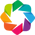

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [104]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Hvplot showing closing price since 2009
reit_master_dataframe.hvplot.line(
    width=1000,
    height=500,
    colorbar=True,
    fontscale=1.25,
    fontsize={"legend":11},
    title="REIT Stock Price since 2009",
    line_width=3,
    )


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
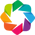

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [105]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Hvplot showing percent change % since 2009
reit_master_dataframe_pctchange.hvplot.line(
    width=1000,
    height=500,
    colorbar=True,
    fontscale=1.25,
    fontsize={"legend":11},
    title="REIT Stock Price % Change since 2009",
    line_width=3,
    )

In [109]:
# Create a REITProphet class that runs a Prophet model on selected REIT

class ReitProphets:
    
    def __init__(self, TickersDict, DataSource, StartDate, EndDate, PlaceholderDf):
    
        self.TickersDict = TickersDict
        self.DataSource = DataSource
        self.StartDate = StartDate
        self.EndDate= EndDate
        self.PlaceholderDf = PlaceholderDf

    def call_data(self):
        
        panel_data = web.DataReader(list(self.TickersDict.values()), self.DataSource, self.StartDate, self.EndDate)
        self.panel_data = panel_data
        return panel_data
    
    def create_closing_price_df(self):
        reit_df_close = self.panel_data['Close']
        self.reit_df_close = reit_df_close
        return reit_df_close
    
    def fb_forecast(self, ForecastTicker):
        for x in TickersDict.values():
            if x == ForecastTicker:
                PlaceholderDf = web.DataReader((x), self.DataSource, self.StartDate, self.EndDate)
        PlaceholderDf = PlaceholderDf.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
        PlaceholderDf = PlaceholderDf.reset_index()
        PlaceholderDf.columns = ['ds', 'y']
        
        prophet_model = Prophet()
        prophet_model.fit(PlaceholderDf)
        
        future_ticker_price = prophet_model.make_future_dataframe(periods=1825, freq="D")
        
        forecast_ticker_price = prophet_model.predict(future_ticker_price)
        
        linegraph = prophet_model.plot(forecast_ticker_price)
        
        return linegraph


In [110]:
# Create a dictionary of our 10 REITS showing REIT name and ticker symbol

TickersDict = {'American Tower Corp' : 'AMT', 
                'AvalonBay Communities Inc' : 'AVB', 
                'Crown Castle Inc' : 'CCI', 
                'Digital Realty Trust Inc' : 'DLR', 
                'Equinix Inc' : 'EQIX', 
                'Realty Income Corp' : 'O', 
                'Prologis Inc' : 'PLD', 
                'Public Storage' : 'PSA', 
                'Simon Property Group Inc' :'SPG', 
                'Welltower Inc' :'WELL'}
                
DataSource = 'yahoo'

StartDate = '2009-03-09'
EndDate = '2022-10-23'
PlaceholderDf = pd.DataFrame()

In [112]:
# Create a dataframe object with all data needed for Prophet model
df = ReitProphets(TickersDict, DataSource, StartDate, EndDate, PlaceholderDf)

# View dataframe using with time series and closing prices using "create_closing_price_df" class method
df.create_closing_price_df()

AttributeError: ignored

In [ ]:
reits_df_for_model.fb_forecast('EQIX')